# Homework 3 - Aprendizagem

>Teresa Matos- ist1106009   
>Francisco Morão - ist1106067   
>Grupo 46   

## II. Programming

Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is
to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various
biomedical measurements.
To answer question 5), average the performance of the models over 10 separate runs. In each
run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10.


5) [2v] Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10
neurons each and no activation functions, and another MLP Regressor with 2 hidden
layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the
MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

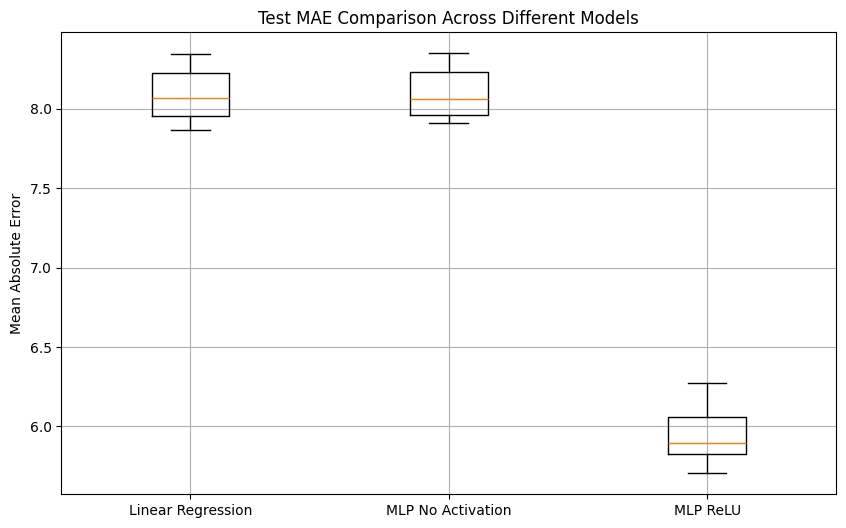

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('parkinsons.csv')

X = data.drop(columns=['target'])
y = data['target']

mae_results = {'Linear Regression': [], 'MLP No Activation': [], 'MLP ReLU': []}

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_mae = mean_absolute_error(y_test, lr_predictions)
    mae_results['Linear Regression'].append(lr_mae)

    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation.fit(X_train, y_train)
    mlp_no_activation_predictions = mlp_no_activation.predict(X_test)
    mlp_no_activation_mae = mean_absolute_error(y_test, mlp_no_activation_predictions)
    mae_results['MLP No Activation'].append(mlp_no_activation_mae)

    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu.fit(X_train, y_train)
    mlp_relu_predictions = mlp_relu.predict(X_test)
    mlp_relu_mae = mean_absolute_error(y_test, mlp_relu_predictions)
    mae_results['MLP ReLU'].append(mlp_relu_mae)

plt.figure(figsize=(10, 6))
plt.boxplot(mae_results.values(), labels=mae_results.keys())
plt.title('Test MAE Comparison Across Different Models')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

6) [3v] Compare a Linear Regression with a MLP with no activations, and explain the impact
and the importance of using activation functions in a MLP. Support your reasoning with the
results from the boxplots

When no activation functions are used, the MLP behaves like a linear model, similar to linear regression, resulting in comparable performance between the two, with a MAE around 8. This is because, without activation functions, the MLP can only model linear relationships, limiting its complexity.
However, when ReLU activation functions are introduced, the performance of the MLP improves significantly. The MLP with ReLU shows a lower median MAE and a tighter range of errors, indicating more accurate and consistent predictions across different runs. This is because activation functions introduce non-linearity into the model, enabling it to learn and represent complex data patterns that linear models cannot capture. 


7) [4v] Using a 80-20 train-test split with random_state=0, use a Grid Search to tune the
hyperparameters of an MLP regressor with two hidden layers (size 10 each). The
parameters to search over are: (i) L2 penalty, with the values {0.0001, 0.001, 0.01}; (ii)
learning rate, with the values {0.001, 0.01, 0.1}; and (iii) batch size, with the values
{32, 64, 128}. Plot the test MAE for each combination of hyperparameters, report the
best combination, and discuss the trade-offs between the combinations.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


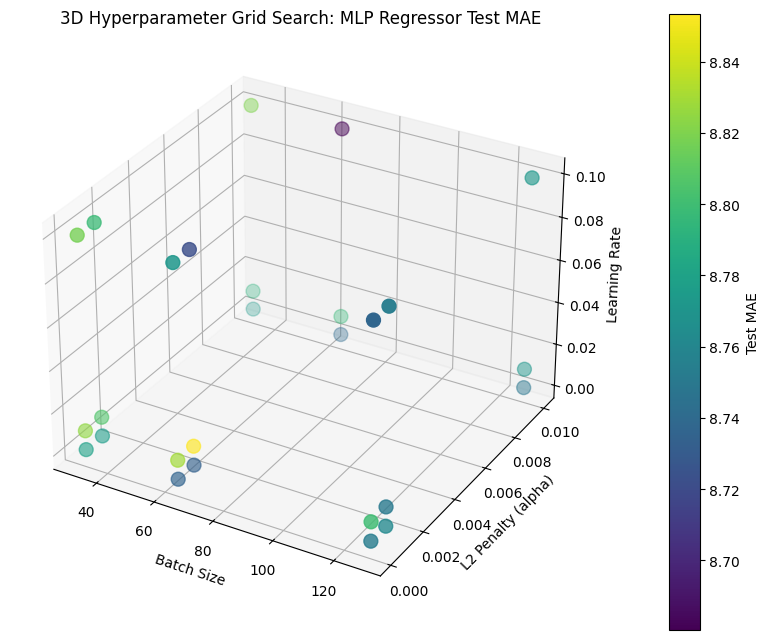

Best Hyperparameters: {'alpha': 0.01, 'batch_size': 64, 'learning_rate_init': 0.1}
Test MAE with Best Hyperparameters: 8.5248


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
Xtrain, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=0)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1], 
    'batch_size': [32, 64, 128]
}

grid_search = GridSearchCV(mlp, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

results_df['mean_test_mae'] = -results_df['mean_test_score']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

alphas = results_df['param_alpha'].astype(float)
learning_rates = results_df['param_learning_rate_init'].astype(float)
batch_sizes = results_df['param_batch_size'].astype(float)
maes = results_df['mean_test_mae'].astype(float)

scatter = ax.scatter(batch_sizes, alphas,learning_rates, c=maes, cmap='viridis', s=100)

ax.set_xlabel('Batch Size')
ax.set_ylabel('L2 Penalty (alpha)')
ax.set_zlabel('Learning Rate')
ax.set_title('3D Hyperparameter Grid Search: MLP Regressor Test MAE')

cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Test MAE')

plt.show()

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
y_pred = grid_search.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE with Best Hyperparameters: {test_mae:.4f}")

Alpha:
    Higher values of alfa increase the regularization strength, which can reduce the model complexity and increase the bias values, resulting in worse performance. Lower values tend to lead the model to overfitting because they decrease the regularization strength. However, the alpha was 0.01, which is relatively small, which indicates that it needs some regularization.

Batch size:
    A batch size 64 is the perfect balance of convergence speed and accuracy. Small batch sizes increase accuracy but at the cost of longer training speeds. Consequently, larger batches can make training faster but with lower accuracy.

Learning rate:
    A learning rate of 0.1 indicates a relatively fast update to the model weights during training. This choice can speed up convergence, but it can risk overshooting optimal values.
    Lower learning rates would make the training process slower but more stable, while a higher learning rate could result in unstable training or diverging results. 